# Anamoly detection using the IsolationForest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

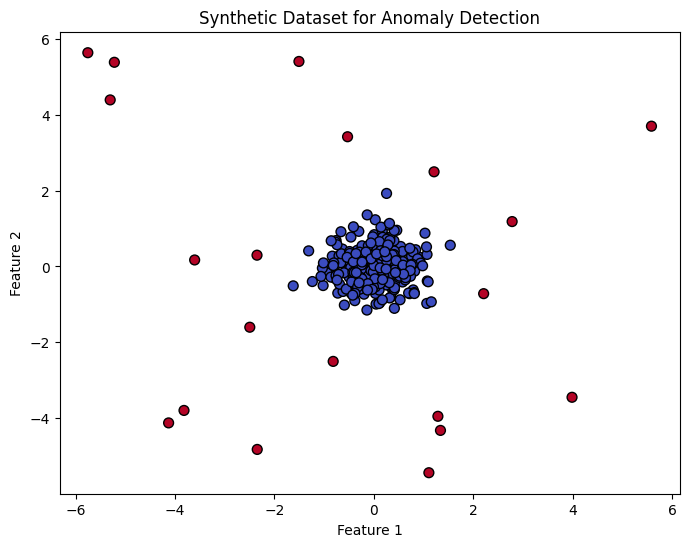

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 1. Generate inliers (normal data)
#    We create 300 samples centered at (0,0) with a small standard deviation.
X_inliers, _ = make_blobs(n_samples=300, 
                          centers=[[0, 0]], 
                          cluster_std=0.5, 
                          random_state=42)

# 2. Generate outliers (anomalies)
#    We generate 20 points uniformly distributed in a larger range.
rng = np.random.RandomState(42)
X_outliers = rng.uniform(low=-6, high=6, size=(20, 2))

# 3. Combine the inliers and outliers into one dataset
X = np.concatenate([X_inliers, X_outliers], axis=0)

# 4. Create labels: 0 for inliers and 1 for outliers (anomalies)
y = np.concatenate([np.zeros(len(X_inliers)), np.ones(len(X_outliers))])

# 5. Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.title("Synthetic Dataset for Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [3]:
import pandas as pd

# Create a DataFrame from the X array and label the columns
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# Add the labels as a new column to the DataFrame
df['Label'] = y.astype(int)  # converting to int for easier reading (0: inlier, 1: anomaly)

# Display the first few rows of the DataFrame
print(df.head())


   Feature1  Feature2  Label
0 -0.595652  0.328277      0
1 -0.272191  0.055461      0
2  0.060148  0.257219      0
3 -0.490754  0.231052      0
4  0.029104 -0.571485      0


In [4]:
from sklearn.ensemble import IsolationForest

In [5]:
clf=IsolationForest(contamination=0.2)
clf.fit(df)
predictions=clf.predict(df)

In [6]:
predictions

array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
       -1,  1,  1,  1,  1

In [7]:
abn_ind=np.where(predictions<0)
abn_ind

(array([  7,  12,  21,  24,  46,  50,  65,  75,  90,  94, 103, 105, 112,
        119, 131, 132, 144, 145, 147, 148, 152, 157, 164, 179, 183, 194,
        199, 203, 206, 215, 218, 219, 221, 235, 246, 247, 253, 256, 274,
        277, 278, 285, 286, 293, 300, 301, 302, 303, 304, 305, 306, 307,
        308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319]),)

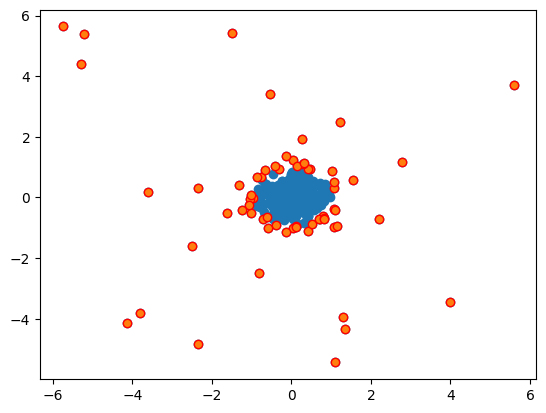

In [8]:
X=df.values
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(X[abn_ind,0],X[abn_ind,1],edgecolors="r")

# Anamoly detection using the DBSCAN

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [10]:
X,y=make_circles(n_samples=1000,factor=0.3,noise=0.1)

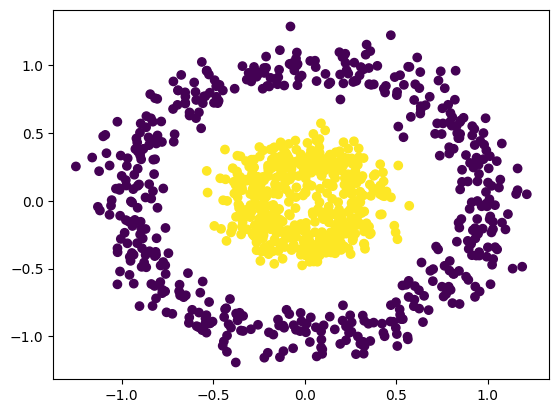

In [11]:
plt.scatter(X[:,0],X[:,1],c=y)

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
dbscan=DBSCAN(eps=0.10)

In [14]:
dbscan.fit_predict(X)

array([ 3,  0,  0,  1, -1,  2,  2,  0,  3, -1,  0,  4,  4,  0,  0,  0,  0,
        4,  2, -1,  0,  5,  0,  0,  0,  4,  0,  0, -1, -1,  4,  3,  2,  0,
        6,  0,  0,  1,  0,  0,  0,  0,  4,  0,  2,  4,  0,  3,  0,  0,  6,
        0,  0,  7,  4,  6, -1,  4,  0,  0,  0,  0,  2,  0,  0,  4,  0,  0,
       -1,  0,  0,  0,  4,  0,  0,  7,  0,  1,  0,  0,  0,  0,  0,  0,  2,
        2,  0,  6,  0,  0,  0,  6,  0,  0,  5,  2,  0,  0,  4,  4,  2,  0,
        4,  3,  0,  3,  0,  2, -1,  3,  6,  2,  0,  7,  2,  1,  2,  3,  0,
        3,  0,  2,  0,  2,  2,  0,  3,  4,  0,  6,  2,  0,  0,  0,  0,  0,
        0,  5,  4,  0,  2,  4,  2,  4,  0,  1,  0,  2,  2,  1,  1,  0,  0,
        2,  0,  3,  4,  0,  2,  0,  0, -1,  0,  4,  3,  0,  0, -1,  4,  4,
        0,  0,  2,  3, -1,  0, -1,  3,  4,  0,  0,  4,  0,  0,  0,  0,  0,
        4,  0,  0,  2,  2,  3,  5,  2,  6,  0,  0,  0,  0, -1,  0,  0,  4,
        4,  0,  1,  0,  2,  5,  0,  0,  0,  0, -1,  2,  0,  2,  2,  0,  2,
        2,  0,  0,  0,  0

In [15]:
dbscan.labels_

array([ 3,  0,  0,  1, -1,  2,  2,  0,  3, -1,  0,  4,  4,  0,  0,  0,  0,
        4,  2, -1,  0,  5,  0,  0,  0,  4,  0,  0, -1, -1,  4,  3,  2,  0,
        6,  0,  0,  1,  0,  0,  0,  0,  4,  0,  2,  4,  0,  3,  0,  0,  6,
        0,  0,  7,  4,  6, -1,  4,  0,  0,  0,  0,  2,  0,  0,  4,  0,  0,
       -1,  0,  0,  0,  4,  0,  0,  7,  0,  1,  0,  0,  0,  0,  0,  0,  2,
        2,  0,  6,  0,  0,  0,  6,  0,  0,  5,  2,  0,  0,  4,  4,  2,  0,
        4,  3,  0,  3,  0,  2, -1,  3,  6,  2,  0,  7,  2,  1,  2,  3,  0,
        3,  0,  2,  0,  2,  2,  0,  3,  4,  0,  6,  2,  0,  0,  0,  0,  0,
        0,  5,  4,  0,  2,  4,  2,  4,  0,  1,  0,  2,  2,  1,  1,  0,  0,
        2,  0,  3,  4,  0,  2,  0,  0, -1,  0,  4,  3,  0,  0, -1,  4,  4,
        0,  0,  2,  3, -1,  0, -1,  3,  4,  0,  0,  4,  0,  0,  0,  0,  0,
        4,  0,  0,  2,  2,  3,  5,  2,  6,  0,  0,  0,  0, -1,  0,  0,  4,
        4,  0,  1,  0,  2,  5,  0,  0,  0,  0, -1,  2,  0,  2,  2,  0,  2,
        2,  0,  0,  0,  0

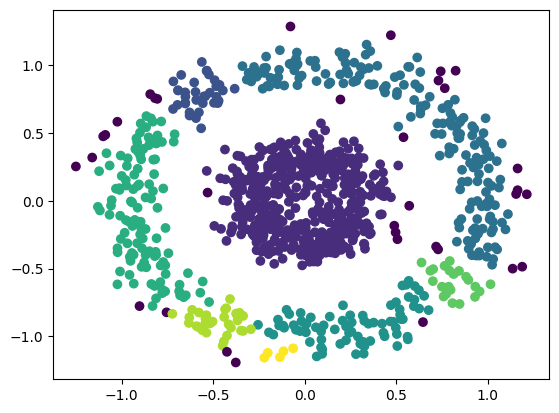

In [16]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

# Anamoly detection using the DBSCAN

In [17]:
from sklearn.neighbors import LocalOutlierFactor

In [18]:
clf=LocalOutlierFactor(n_neighbors=2)

In [19]:
y=clf.fit_predict(X)

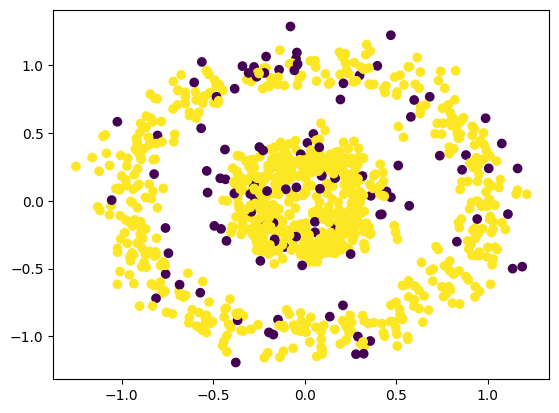

In [20]:
plt.scatter(X[:,0],X[:,1],c=y)